<a href="https://colab.research.google.com/github/REDDY7208/git-tuts/blob/master/SVM_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case:-To find out based on given features whether the loan will get approved or not

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('loan_approved.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Checks

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## EDA

### Univariate Analysis

In [ ]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [ ]:
data1 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [ ]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban
4,Male,No,0,Graduate,No,360.0,1.0,Urban


In [ ]:
data2 = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

In [ ]:
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


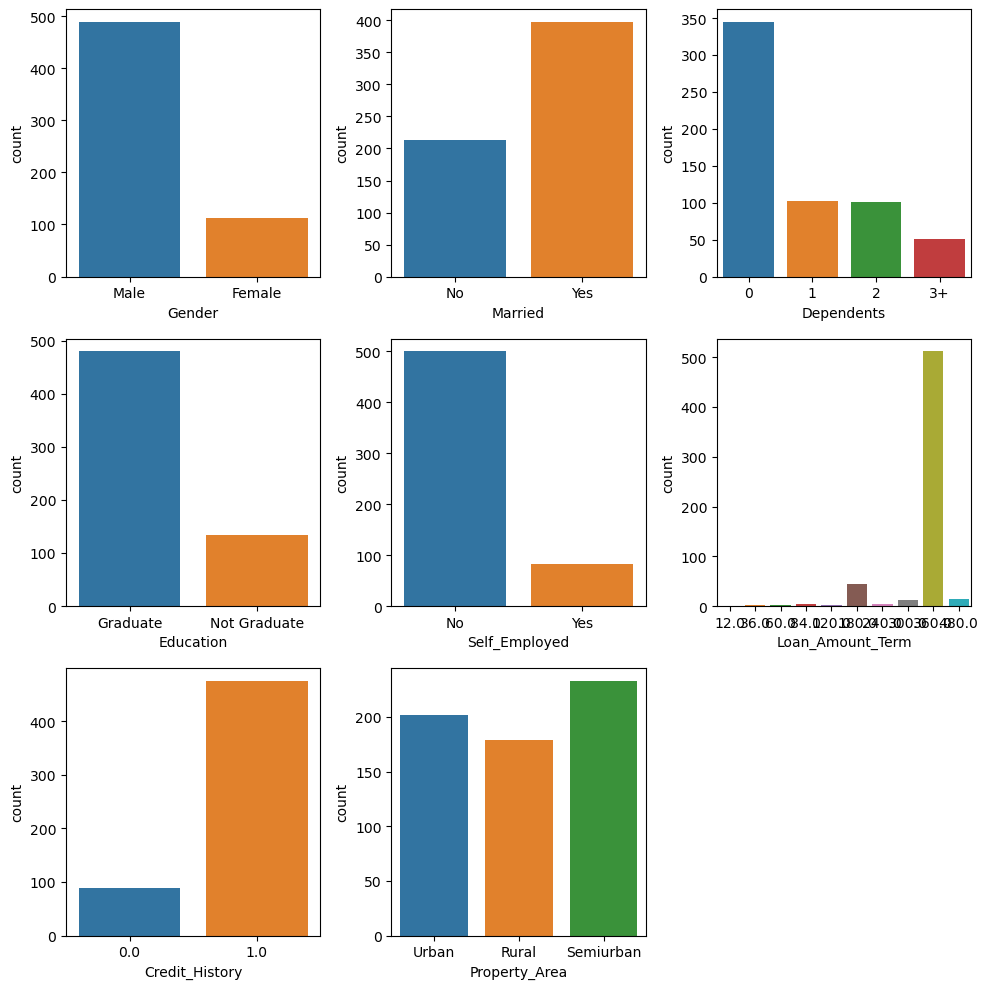

In [ ]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.countplot(x = data1[i])
    plotnumber = plotnumber + 1

plt.tight_layout()

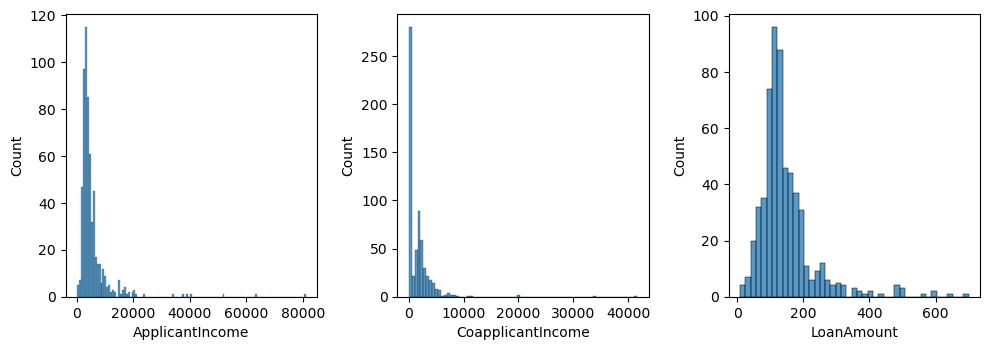

In [ ]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for i in data2:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = data2[i])
    plotnumber = plotnumber + 1

plt.tight_layout()

## Bivariate Analysis

In [ ]:
data.rename(columns = {'Loan_Status (Approved)' : 'Loan_Status'}, inplace = True)

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

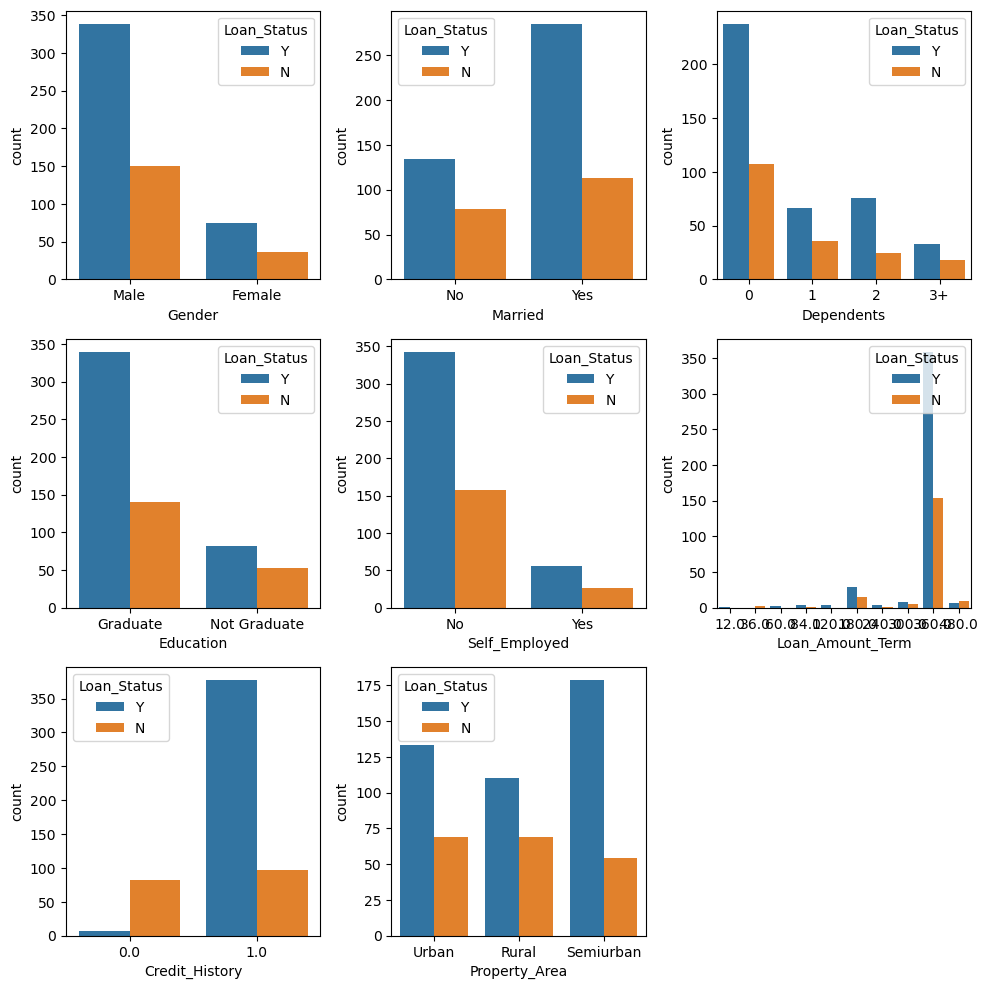

In [ ]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.countplot(x = data1[i], hue = data['Loan_Status'])
    plotnumber = plotnumber + 1

plt.tight_layout()

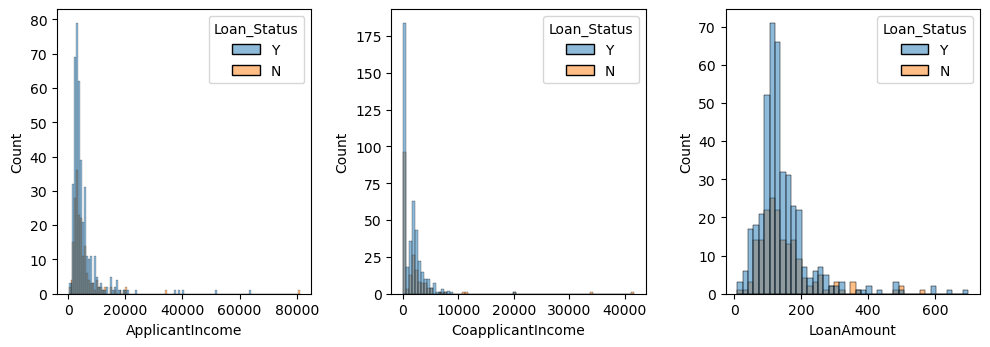

In [ ]:
plt.figure(figsize = (10, 10))
plotnumber = 1

for i in data2:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = data2[i], hue = data['Loan_Status'])
    plotnumber = plotnumber + 1

plt.tight_layout()

## Data Preprocessing

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
data.loc[data.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [ ]:
data.loc[data.Gender.isnull(), 'Gender']

23     NaN
126    NaN
171    NaN
188    NaN
314    NaN
334    NaN
460    NaN
467    NaN
477    NaN
507    NaN
576    NaN
588    NaN
592    NaN
Name: Gender, dtype: object

In [ ]:
data.loc[data.Gender.isnull(), 'Gender'] = 'Male'

In [ ]:
data.Gender.isnull().sum()

0

In [ ]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
data.loc[data.Married.isnull(), 'Married'] = 'No'

In [ ]:
data.Married.isnull().sum()

0

In [ ]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.loc[data.Dependents.isnull(), 'Dependents'] = '3+'

In [ ]:
data.Dependents.isnull().sum()

0

In [ ]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data.loc[data.Self_Employed.isnull(), 'Self_Employed'] = 'No'

In [ ]:
np.median(data.LoanAmount.dropna())

128.0

In [ ]:
data.loc[data.LoanAmount.isnull(), 'LoanAmount'] = np.median(data.LoanAmount.dropna())

In [ ]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data.loc[data.Loan_Amount_Term.isnull(), 'Loan_Amount_Term'] = 360.0

In [ ]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data.loc[data.Credit_History.isnull(), 'Credit_History'] = 0.0

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Conversion of categorical data into numerical data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.Gender = le.fit_transform(data.Gender)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.Married = le.fit_transform(data.Married)
data.Dependents = le.fit_transform(data.Dependents)
data.Education = le.fit_transform(data.Education)
data.Self_Employed = le.fit_transform(data.Self_Employed)
data.Credit_History = le.fit_transform(data.Credit_History)
data.Property_Area = le.fit_transform(data.Property_Area)
data.Loan_Status = le.fit_transform(data.Loan_Status)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


Task : Handling Outliers

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data.ApplicantIncome = scaler.fit_transform(data[['ApplicantIncome']])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,0.054830,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,0.035250,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,0.030093,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,0.072356,0.0,141.0,360.0,1,2,1


In [ ]:
data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

## Feature Selection

In [ ]:
data = data.drop('Loan_ID', axis =1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1,2,1


In [ ]:
data.drop('Loan_Status', axis = 1).corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.367389,0.161451,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.026655,-0.025752
Married,0.367389,1.000000,0.307667,0.017671,0.008491,0.050194,0.080496,0.145717,-0.103381,-0.023626,0.000395
Dependents,0.161451,0.307667,1.000000,0.061179,0.054023,0.110073,0.016073,0.140926,-0.084271,-0.034355,0.025773
Education,0.045364,0.017671,0.061179,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.081637,-0.065243
Self_Employed,-0.000525,0.008491,0.054023,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.004994,-0.030860
ApplicantIncome,0.058809,0.050194,0.110073,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,0.006986,-0.009500
CoapplicantIncome,0.082912,0.080496,0.016073,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,-0.058795,0.010522
LoanAmount,0.106904,0.145717,0.140926,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.034473,-0.046632
Loan_Amount_Term,-0.074030,-0.103381,-0.084271,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,0.002361,-0.076120
Credit_History,0.026655,-0.023626,-0.034355,-0.081637,-0.004994,0.006986,-0.058795,-0.034473,0.002361,1.000000,-0.018761


<AxesSubplot:>

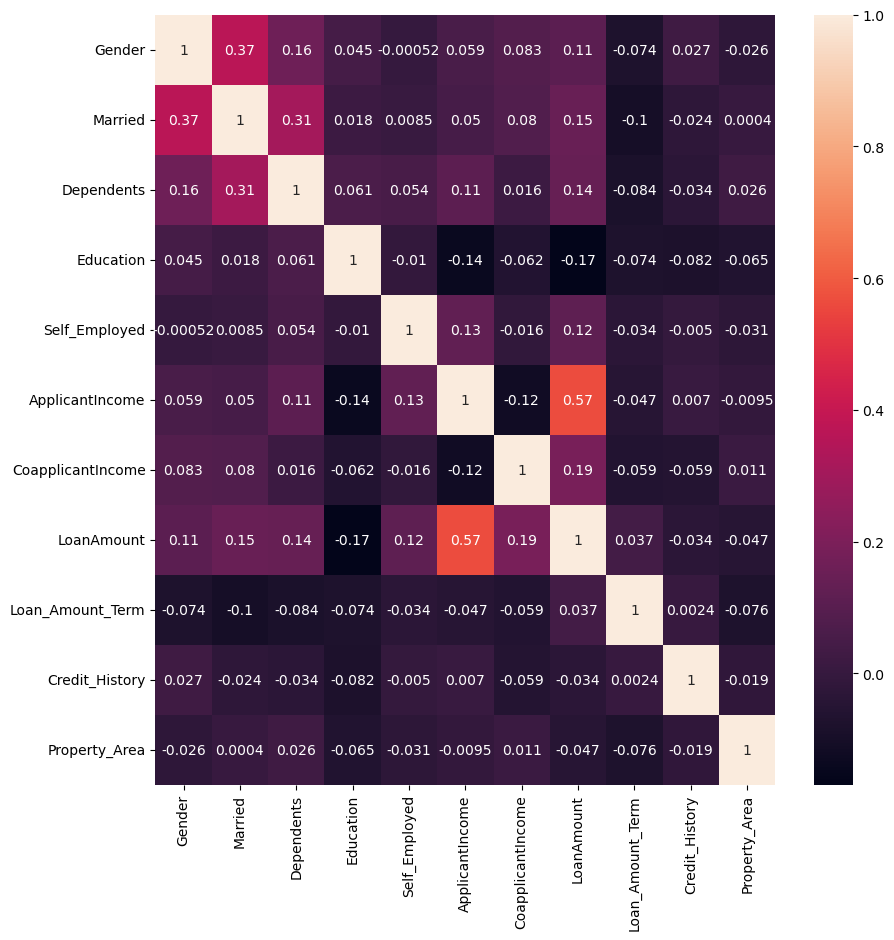

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.drop('Loan_Status', axis = 1).corr(), annot = True)

## Model Creation

In [ ]:
x = data.drop('Loan_Status', axis = 1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1,2
1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1,2
3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1,2
4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1,2


In [ ]:
y = data.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
92,1,1,2,1,0,0.038627,0.043680,0.104197,0.743590,1,2
304,1,0,0,0,0,0.047619,0.060000,0.189580,0.743590,1,0
68,1,1,3,1,1,0.085962,0.000000,0.167873,0.102564,1,2
15,1,0,0,0,0,0.059369,0.000000,0.167873,0.743590,1,2
211,1,1,3,0,0,0.040569,0.030000,0.172214,0.743590,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,0.021336,0.045000,0.127352,0.743590,1,1
106,1,1,2,0,0,0.139357,0.027024,0.312590,0.743590,1,2
270,0,0,0,0,0,0.038182,0.000000,0.030391,0.743590,1,2
435,0,0,3,0,0,0.122412,0.000000,0.172214,0.487179,1,1


In [ ]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,0,0,0.110489,0.000000,0.316932,0.74359,1,1
377,1,1,0,0,0,0.051453,0.000000,0.175109,0.74359,0,1
163,1,1,2,0,0,0.049685,0.034728,0.215630,0.74359,1,0
609,0,0,0,0,0,0.034014,0.000000,0.089725,0.74359,1,0
132,1,0,0,0,0,0.031763,0.000000,0.088278,0.74359,1,1
...,...,...,...,...,...,...,...,...,...,...,...
535,1,0,0,1,0,0.029685,0.049008,0.169320,0.74359,1,0
468,0,1,2,1,0,0.000742,0.070007,0.128799,0.74359,1,1
582,0,1,0,0,0,0.037304,0.000000,0.039074,0.74359,1,1
291,1,1,2,0,0,0.052566,0.000000,0.170767,0.74359,0,1


In [ ]:
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({1: 322, 0: 138})
Counter({1: 322, 0: 322})


In [ ]:
from sklearn.svm import SVC
sv = SVC()

In [ ]:
sv.fit(x_sm, y_sm)

SVC()

In [ ]:
y_pred = sv.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.7402597402597403

In [ ]:
precision_score(y_test, y_pred)

0.7727272727272727

In [ ]:
recall_score(y_test, y_pred)

0.85

In [ ]:
f1_score(y_test, y_pred)

0.8095238095238095

In [ ]:
confusion_matrix(y_test, y_pred)

array([[29, 25],
       [15, 85]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59        54
           1       0.77      0.85      0.81       100

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



## Cross Validation

In [ ]:
from sklearn.svm import SVC
sv1 = SVC()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sv1, x, y, scoring = 'f1', cv = 5)
scores

array([0.86813187, 0.82608696, 0.81111111, 0.85057471, 0.85875706])

In [ ]:
np.mean(scores)

0.8429323421110577

In [ ]:
np.std(scores)

0.02116696228205032

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
grid = GridSearchCV(sv1, param_grid, scoring = 'f1', verbose = 3)

In [ ]:
grid.fit(x_sm, y_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.726 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.697 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.721 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.697 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.691 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.787 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.739 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.736 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.773 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.811 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 1/5] END .................C=1000, gamma=0.1;, score=0.718 total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.652 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.678 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.746 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.685 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.722 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.739 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.736 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.773 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.811 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.787 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.739 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [ ]:
sv2 = SVC(C = 1, gamma = 0.01, random_state = 42)

In [ ]:
sv2.fit(x_sm, y_sm)

SVC(C=1, gamma=0.01, random_state=42)

In [ ]:
y_pred1 = sv2.predict(x_test)

In [ ]:
y_pred1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
scores_after = cross_val_score(sv2, x, y, cv = 3, scoring = 'f1')
print(scores_after)
print('Cross Validation score: ', scores_after.mean())
print('Standard Deviation', scores_after.std())

[0.8150289  0.8150289  0.81395349]
Cross Validation score:  0.8146704306134337
Standard Deviation 0.0005069547205710685
